#K-Nearest Neighborhood (From Scratch)

In [0]:
#KNN is the distance measure first and then popluar voting system...


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 

%matplotlib inline 


In [2]:
# I need the data file

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/teleCust1000t.csv')

In [4]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


###the first 11 are independent variables, an the last column (custcat = customer categories, there are *four categories*) 

In [5]:
df.tail()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

you may now plot several figures or histograms to see how the data look likes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2314f30c18>]],
      dtype=object)

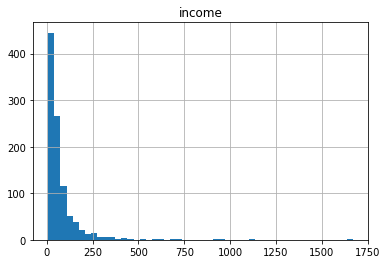

In [8]:
df.hist(column ='income', bins = 50)

##Analysis with KNN

In [0]:
X  = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values 

In [11]:
X[994:999]

array([[  1.,  15.,  46.,   1.,  17.,  63.,   5.,   1.,   0.,   0.,   2.],
       [  3.,  10.,  39.,   0.,   0.,  27.,   3.,   0.,   0.,   1.,   3.],
       [  1.,   7.,  34.,   0.,   2.,  22.,   5.,   5.,   0.,   1.,   1.],
       [  3.,  67.,  59.,   0.,  40., 944.,   5.,  33.,   0.,   1.,   1.],
       [  3.,  70.,  49.,   0.,  18.,  87.,   2.,  22.,   0.,   1.,   1.]])

In [0]:
y = df['custcat'].values

In [13]:
y[0:5]

array([1, 4, 3, 1, 3])

###Normalize - because the scale of each data (independent variable) is different (mean = 0, variance = 1)

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [15]:
X[994:999]

array([[-1.25277087, -0.96144436,  0.34383492,  1.0100505 ,  0.54048764,
        -0.13585302,  1.9062271 , -0.99106437, -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.19564595, -0.21382135, -0.9900495 , -1.1457465 ,
        -0.47233108,  0.26927811, -1.09029981, -0.22207644,  0.96655883,
         0.46617787],
       [-1.25277087, -1.3361669 , -0.61214725, -0.9900495 , -0.94736601,
        -0.51906415,  1.9062271 , -0.5941226 , -0.22207644,  0.96655883,
        -0.92747794],
       [ 1.19883553,  1.47425216,  1.37948227, -0.9900495 ,  2.82186323,
         8.09851297,  1.9062271 ,  2.18446981, -0.22207644,  0.96655883,
        -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, -0.9900495 ,  0.63967788,
         0.08846569, -0.54919639,  1.09287993, -0.22207644,  0.96655883,
        -0.92747794]])

#Now, you need to split the data (cross-validation) 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [21]:
X_train.shape

(800, 11)

#It is time to design KNN

In [0]:
def euclidean_distance(vector1, vector2):
  return np.sqrt(np.sum(np.power(vector1-vector2,2)))

In [0]:
def absolute_distance(vector1, vector2):
  return np.sum(np.absolute(vector1 - vector2))

- Choose the K nearnest data from the whole data set (if k = 3, choose 3 points)

In [0]:
import operator #C programm

def get_neighbour(X_train, X_test_instance, k):

  distances = []
  neighbors = [] 

  for i in range(0, X_train.shape[0]):
    dist = absolute_distance(X_train[i], X_test_instance) #the distance between each point in the data set and the new data set
    distances.append((i, dist))
  distances.sort(key = operator.itemgetter(1)) #using C function 

  for x in range(k): 
    neighbors.append(distances[x][0])
  return neighbors

- Class voting system (what is the most popular in the K nearest points)

In [0]:
def predictKNNClass(output, y_train): # y_train has the class information, and this function should calcuate what class the new point would be  

  classVotes = {}
  for i in range (len(output)):
    if y_train[output[i]] in classVotes:
      classVotes[y_train[output[i]]] += 1
    else: 
      classVotes[y_train[output[i]]] = 1
  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse = True) 
  return sortedVotes[0][0]


- Define the test fuction for accuracy.

In [0]:
def KNN_test(X_train, X_test, Y_train, Y_test, k):
  output_classes = [] 

  for i in range(0, X_test.shape[0]):
    output = get_neighbour(X_train, X_test[i], k)
    predictedClass = predictKNNClass(output, Y_train) 
    output_classes.append(predictedClass)
  return output_classes

Accuracy making...

In [0]:
def prediction_accuracy(predicted_labels, original_labels):
  count = 0
  for i in range(len(predicted_labels)):
    if predicted_labels[i] == original_labels[i]:
      count +=1
  return float(count)/len(predicted_labels)

Real Main function


In [41]:
predicted_classes = {}
final_accuracies = {}

for k in range (1, 20):
  predicted_classes[k] = KNN_test(X_train, X_test, y_train, y_test, k)
  final_accuracies[k] = prediction_accuracy(predicted_classes[k], y_test)

  print ("K ", k, '\t')
  print(final_accuracies[k])

K  1 	
0.325
K  2 	
0.325
K  3 	
0.35
K  4 	
0.345
K  5 	
0.34
K  6 	
0.35
K  7 	
0.355
K  8 	
0.35
K  9 	
0.345
K  10 	
0.35
K  11 	
0.37
K  12 	
0.35
K  13 	
0.33
K  14 	
0.345
K  15 	
0.34
K  16 	
0.34
K  17 	
0.35
K  18 	
0.385
K  19 	
0.35


# SkLearn library to use for KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier



In [53]:
k = 18 
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) # neigh is your trained model from KNN
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [52]:
yhat = neigh.predict(X_test)
yhat

array([3, 2, 4, 2, 4, 3, 3, 1, 1, 2, 1, 4, 3, 3, 3, 1, 4, 3, 3, 2, 3, 3,
       1, 4, 4, 1, 2, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 3, 2, 4, 3, 4, 3, 1,
       4, 1, 1, 1, 4, 4, 1, 1, 2, 3, 2, 3, 4, 1, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 2, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 3, 1, 3, 1, 4, 3, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 1, 4, 2, 2, 2, 1,
       4, 3, 2, 4, 1, 2, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 4, 3, 3, 2, 3, 1,
       1, 3, 3, 2, 2, 1, 3, 3, 4, 2, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 4, 2,
       4, 3, 3, 3, 2, 3, 3, 1, 2, 1, 3, 4, 1, 1, 3, 1, 3, 4, 3, 3, 4, 2,
       3, 4, 1, 1, 1, 3, 1, 3, 4, 2, 3, 1, 2, 1, 3, 3, 4, 3, 3, 4, 1, 3,
       1, 3])

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, neigh.predict(X_train))) #Training accuracy
print(metrics.accuracy_score(y_test, yhat)) #testing accuracy 

0.45625
0.35
